In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn import svm
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_excel("MULTI-DRUG RESISTANCE TB.xls")

In [3]:
df.head()

,Age,Sex,Marital Status,Poverty Level,Prison History,Completed Secondary Education,History of Tobacco Use,Alcohol Use at Least Once Per Week,History of Drug Use,History of Rehab,MDR-TB,Body Mass Index,History of Chronic Disease,HIV Status,History Diabetes Melitus,Treatment Outcome
0,38 and older,Male,Single,Not in poverty,No,Yes,Used to smoke,Yes,No,No,No,Underweight,No,Negative,No,Cured
1,38 and older,Male,Married/cohabitating,Not in poverty,No,Yes,Never smoked,No,No,No,No,Normal,No,Negative,No,Cured
2,27 to 37,Male,Married/cohabitating,Not in poverty,No,No,Never smoked,Yes,Yes,Yes,No,Underweight,No,Negative,No,Cured
3,27 to 37,Male,Married/cohabitating,Poverty/extreme poverty,No,No,Never smoked,Yes,No,No,No,Normal,No,Negative,No,Cured
4,38 and older,Male,Married/cohabitating,Not in poverty,No,Yes,Never smoked,NaN,No,No,No,Overweight/Obese,No,Test not done,No,Cured


## Data exploration

In [4]:
# check columns available
len(df.columns)
df.columns
#possible irrelevant features



Index(['Age', 'Sex', 'Marital Status', 'Poverty Level', 'Prison History',
       'Completed Secondary Education', 'History of Tobacco Use',
       'Alcohol Use at Least Once Per Week', 'History of Drug Use',
       'History of Rehab', 'MDR-TB', 'Body Mass Index',
       'History of Chronic Disease', 'HIV Status', 'History Diabetes Melitus',
       'Treatment Outcome'],
      dtype='object')

In [5]:
df.dtypes

Age                                   object
Sex                                   object
Marital Status                        object
Poverty Level                         object
Prison History                        object
Completed Secondary Education         object
History of Tobacco Use                object
Alcohol Use at Least Once Per Week    object
History of Drug Use                   object
History of Rehab                      object
MDR-TB                                object
Body Mass Index                       object
History of Chronic Disease            object
HIV Status                            object
History Diabetes Melitus              object
Treatment Outcome                     object
dtype: object

In [6]:
# check null values 
print(df.isnull().values.sum())

72


In [7]:
# check columnwise missing values 
df.isnull().sum()


Age                                    0
Sex                                    0
Marital Status                         2
Poverty Level                         23
Prison History                         2
Completed Secondary Education          1
History of Tobacco Use                 3
Alcohol Use at Least Once Per Week    10
History of Drug Use                    0
History of Rehab                       3
MDR-TB                                 0
Body Mass Index                       12
History of Chronic Disease             0
HIV Status                             0
History Diabetes Melitus               1
Treatment Outcome                     15
dtype: int64

I am going to drop the time to defaul(Days) because most are null
I think even the Id should be dropped

**Question**

How should I deal with the other feature with null values? should I drop them or impute(replace) them?

### Age distribution

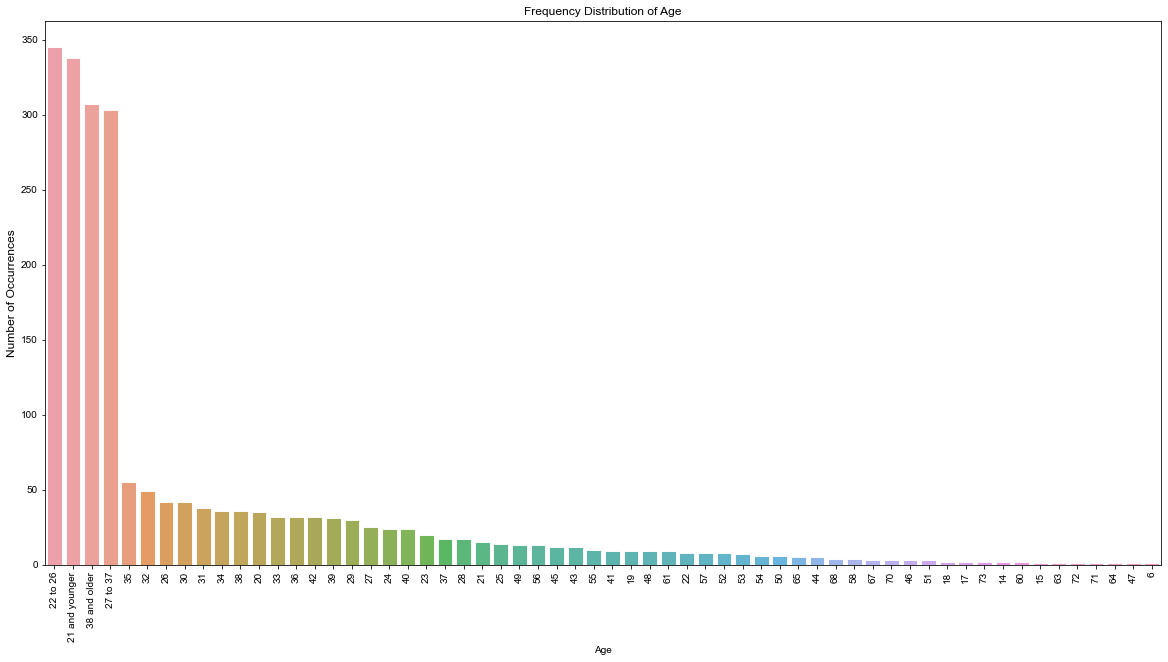

In [8]:
fig, ax = plt.subplots(figsize=(20, 10))
age_count = df['Age'].value_counts()
sns.set(style="darkgrid")
sns.barplot(age_count.index, age_count.values, alpha=0.9)
plt.title('Frequency Distribution of Age')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Age')
plt.xticks(rotation=90) 
plt.show()

In [9]:
## age unique values 
df.Age.unique()

array(['38 and older', '27 to 37', '22 to 26', '21 and younger', 23, 19,
       33, 30, 25, 35, 55, 56, 34, 29, 45, 57, 67, 72, 40, 31, 21, 32, 27,
       43, 53, 24, 36, 44, 52, 28, 39, 47, 48, 26, 58, 37, 42, 38, 64, 49,
       46, 41, 20, 50, 65, 68, 73, 61, 22, 60, 70, 54, 51, 63, 71, 18, 6,
       15, 14, 17], dtype=object)

## replace age distribution 

In [10]:
#df.loc[df['Age'] <= 21, 'Age'] = '21 and younger'

In [11]:
#n = int(line) if line.is_integer() else int(float(line))

In [12]:
def check_and_addrange(x):  
    if type(x) == int:
        if  x <= 21:
            x = '21 and younger'
        elif x >21 and x<27:
            x = '22 to 26'
        elif x >26 and x<38:
            x ='27 to 37'
        elif x >= 38:
            x = '38 and older'
    else:
        x =x
    return x
    


df['Age'] = df['Age'].apply(lambda x: check_and_addrange(x))

## Gender Distribution

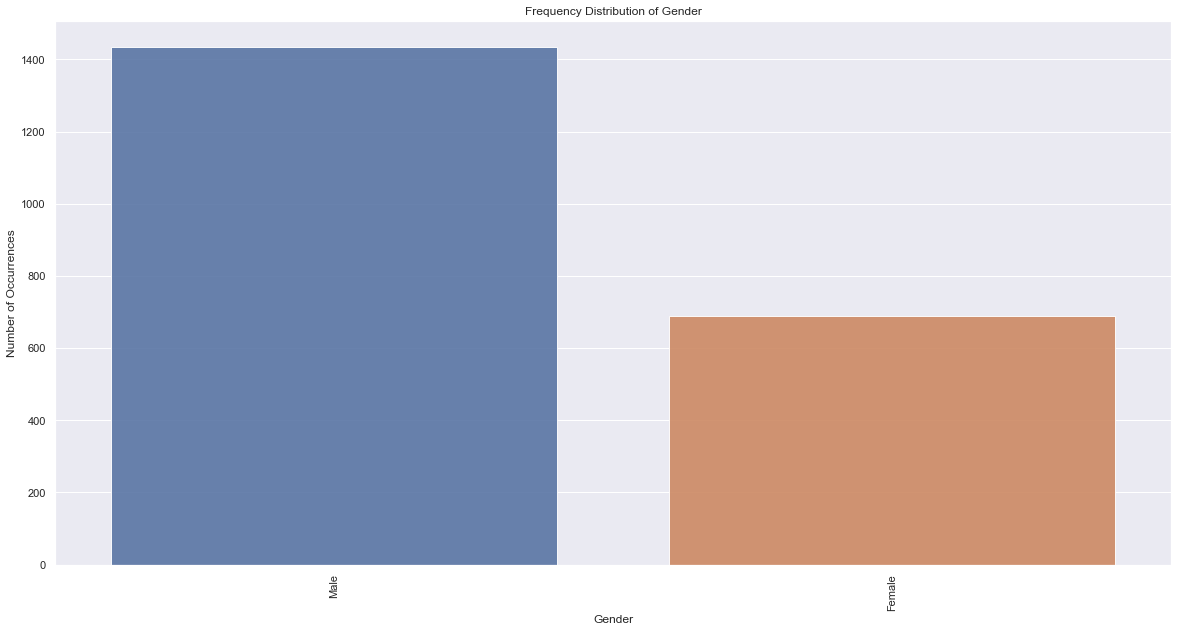

In [13]:
fig, ax = plt.subplots(figsize=(20, 10))
gender_count = df['Sex'].value_counts()
sns.set(style="darkgrid")
sns.barplot(gender_count.index, gender_count.values, alpha=0.9)
plt.title('Frequency Distribution of Gender')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Gender')
plt.xticks(rotation=90) 
plt.show()

## Marital status

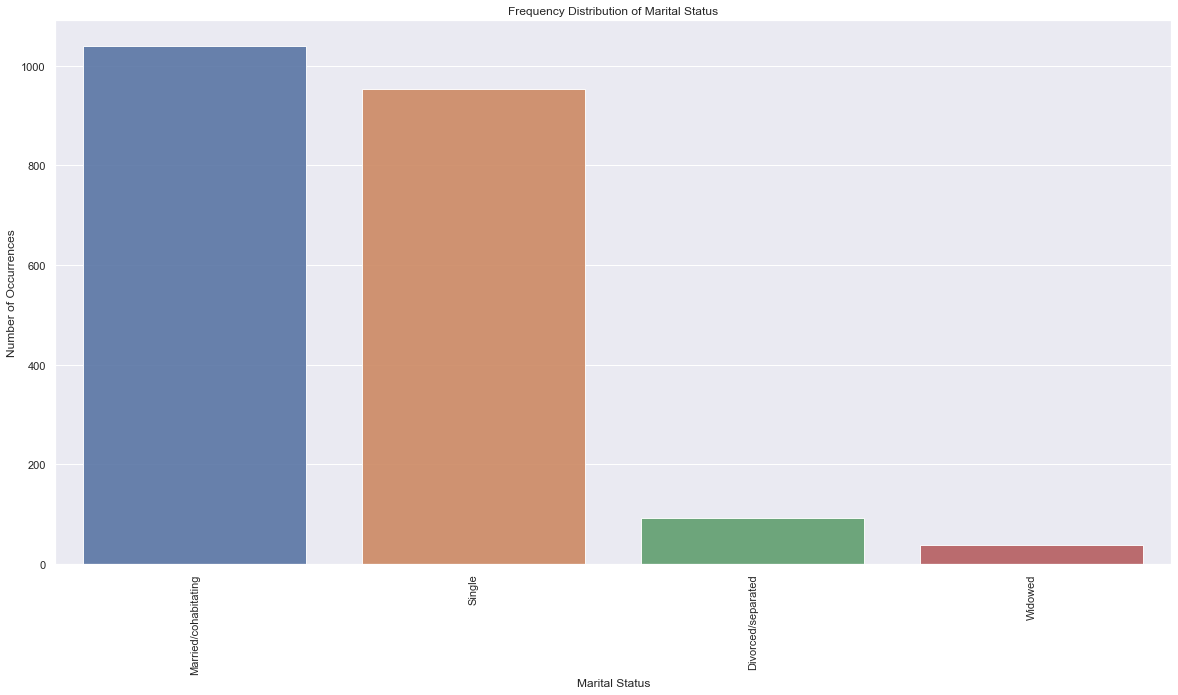

In [14]:
fig, ax = plt.subplots(figsize=(20, 10))
gender_count = df['Marital Status'].value_counts()
sns.set(style="darkgrid")
sns.barplot(gender_count.index, gender_count.values, alpha=0.9)
plt.title('Frequency Distribution of Marital Status')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Marital Status')
plt.xticks(rotation=90) 
plt.show()

## Poverty Level

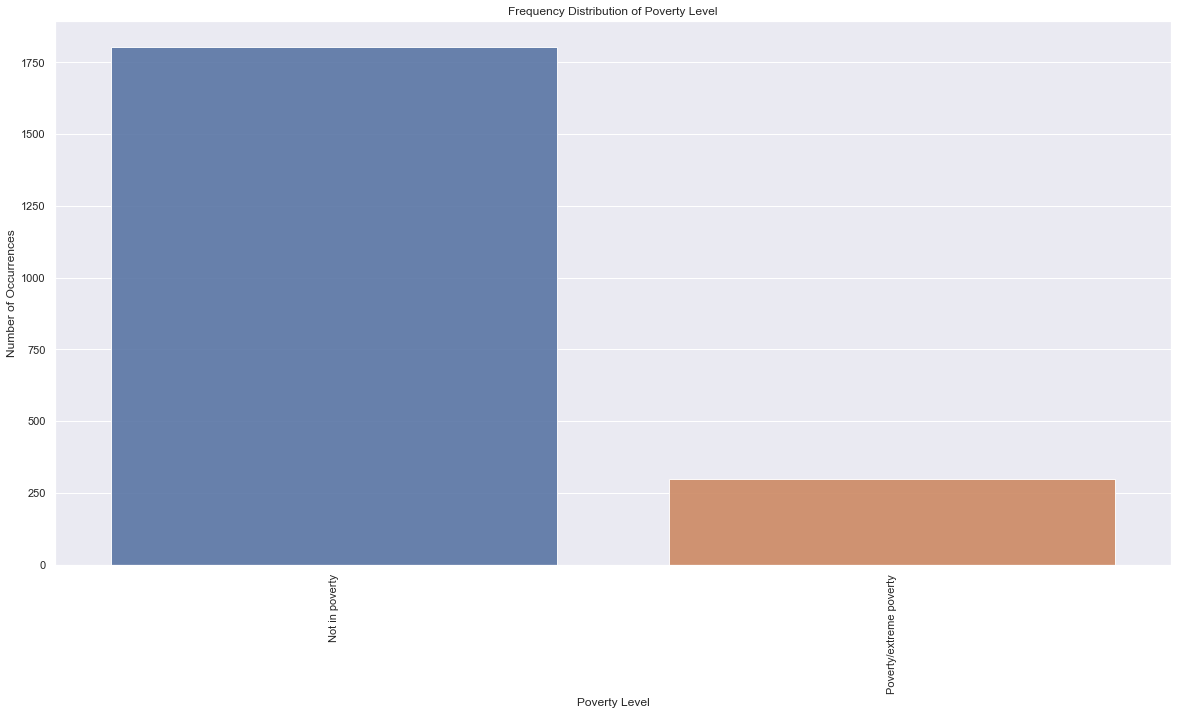

In [15]:
fig, ax = plt.subplots(figsize=(20, 10))
gender_count = df['Poverty Level'].value_counts()
sns.set(style="darkgrid")
sns.barplot(gender_count.index, gender_count.values, alpha=0.9)
plt.title('Frequency Distribution of Poverty Level')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Poverty Level')
plt.xticks(rotation=90) 
plt.show()

In [16]:
df.columns

Index(['Age', 'Sex', 'Marital Status', 'Poverty Level', 'Prison History',
       'Completed Secondary Education', 'History of Tobacco Use',
       'Alcohol Use at Least Once Per Week', 'History of Drug Use',
       'History of Rehab', 'MDR-TB', 'Body Mass Index',
       'History of Chronic Disease', 'HIV Status', 'History Diabetes Melitus',
       'Treatment Outcome'],
      dtype='object')

## Prison History

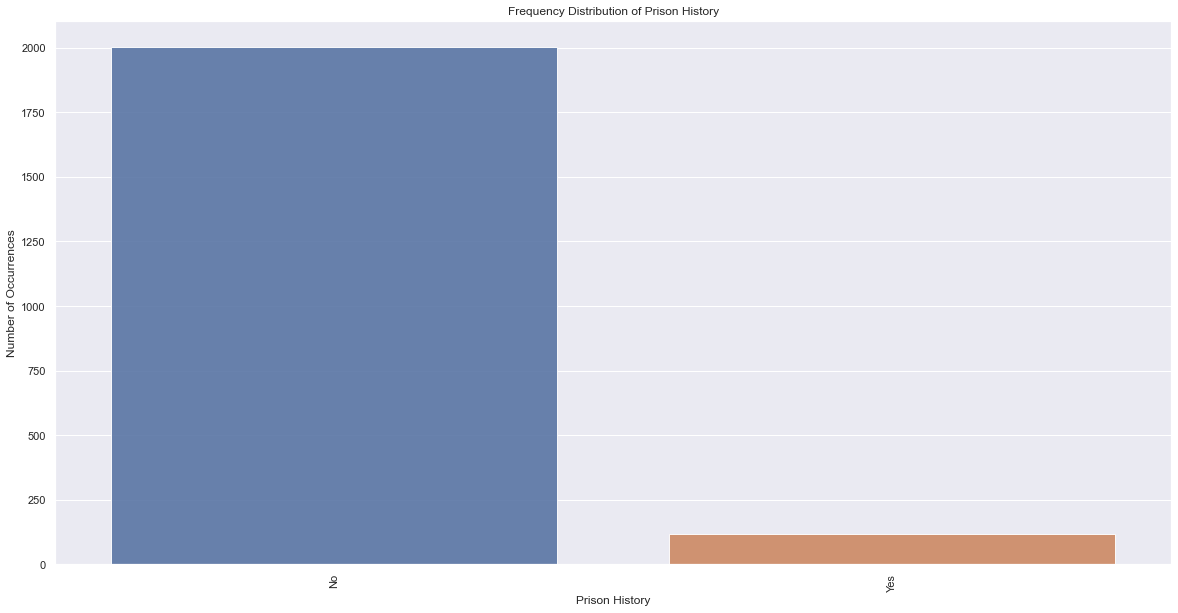

In [17]:
fig, ax = plt.subplots(figsize=(20, 10))
age_count = df['Prison History'].value_counts()
sns.set(style="darkgrid")
sns.barplot(age_count.index, age_count.values, alpha=0.9)
plt.title('Frequency Distribution of Prison History')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Prison History')
plt.xticks(rotation=90) 
plt.show()

## Completed Secondary Education

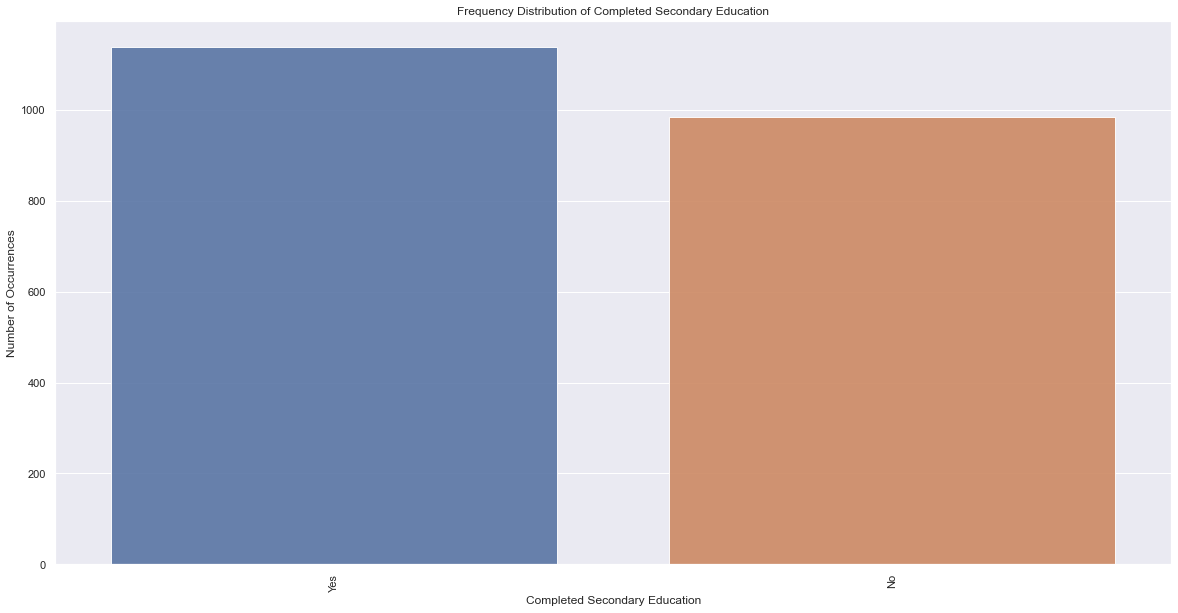

In [18]:
fig, ax = plt.subplots(figsize=(20, 10))
age_count = df['Completed Secondary Education'].value_counts()
sns.set(style="darkgrid")
sns.barplot(age_count.index, age_count.values, alpha=0.9)
plt.title('Frequency Distribution of Completed Secondary Education')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Completed Secondary Education')
plt.xticks(rotation=90) 
plt.show()


## History of Tobacco Use

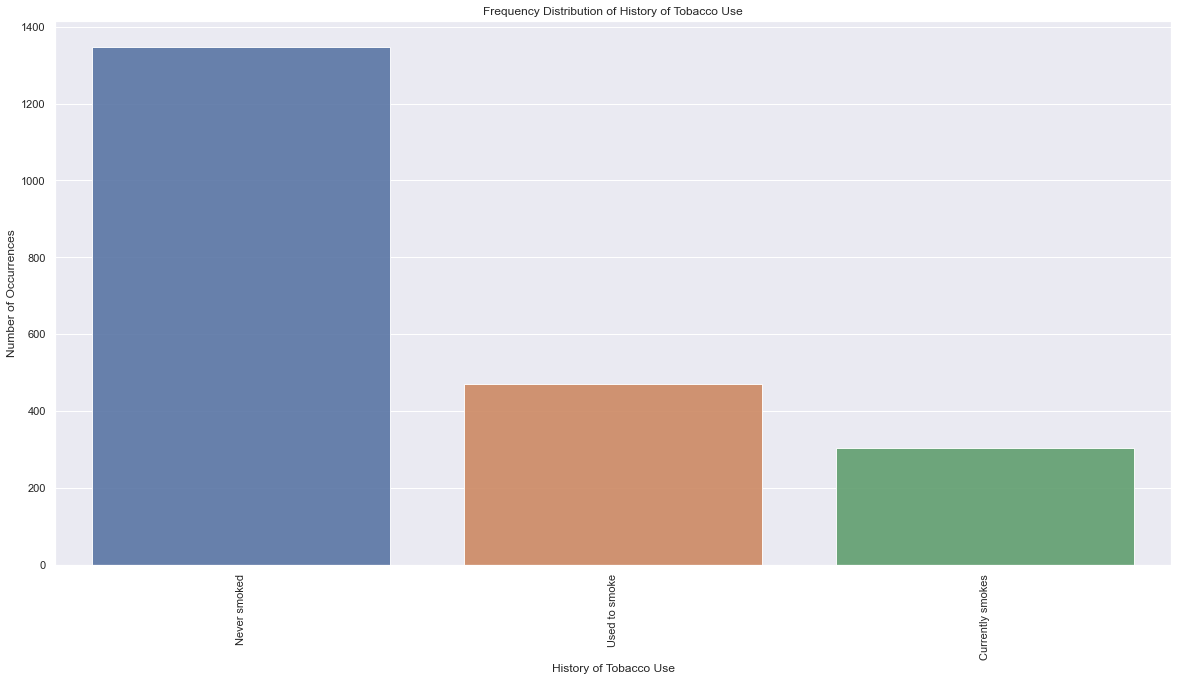

In [19]:
fig, ax = plt.subplots(figsize=(20, 10))
age_count = df['History of Tobacco Use'].value_counts()
sns.set(style="darkgrid")
sns.barplot(age_count.index, age_count.values, alpha=0.9)
plt.title('Frequency Distribution of History of Tobacco Use')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('History of Tobacco Use')
plt.xticks(rotation=90) 
plt.show()

## Alcohol Use at Least Once Per Week

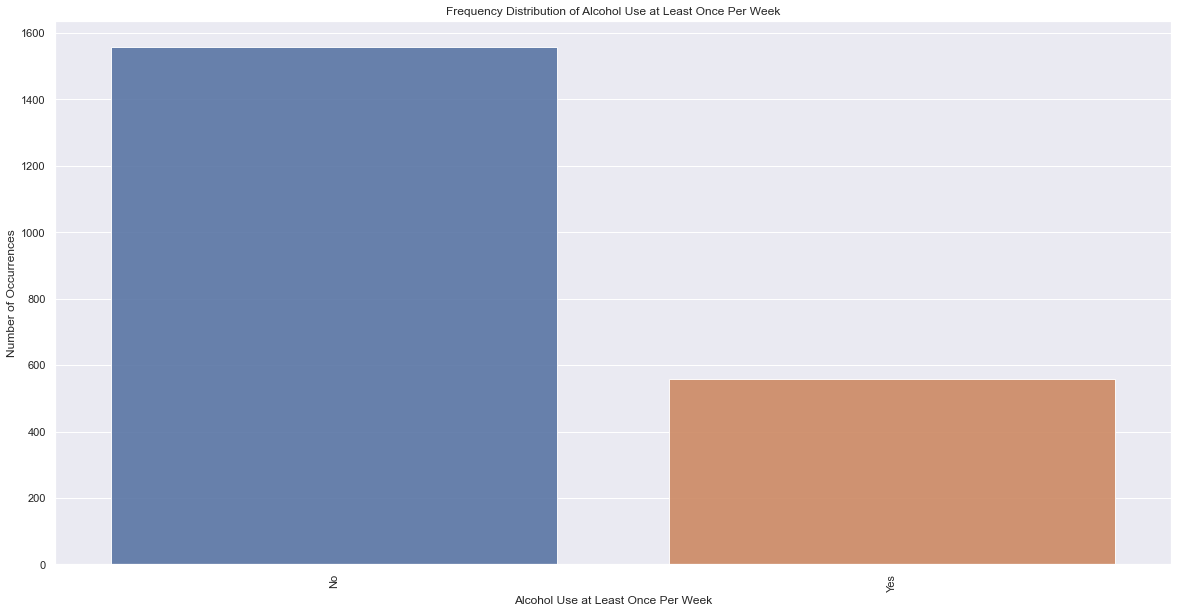

In [20]:
fig, ax = plt.subplots(figsize=(20, 10))
age_count = df['Alcohol Use at Least Once Per Week'].value_counts()
sns.set(style="darkgrid")
sns.barplot(age_count.index, age_count.values, alpha=0.9)
plt.title('Frequency Distribution of Alcohol Use at Least Once Per Week')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Alcohol Use at Least Once Per Week')
plt.xticks(rotation=90) 
plt.show()

## History of Drug Use

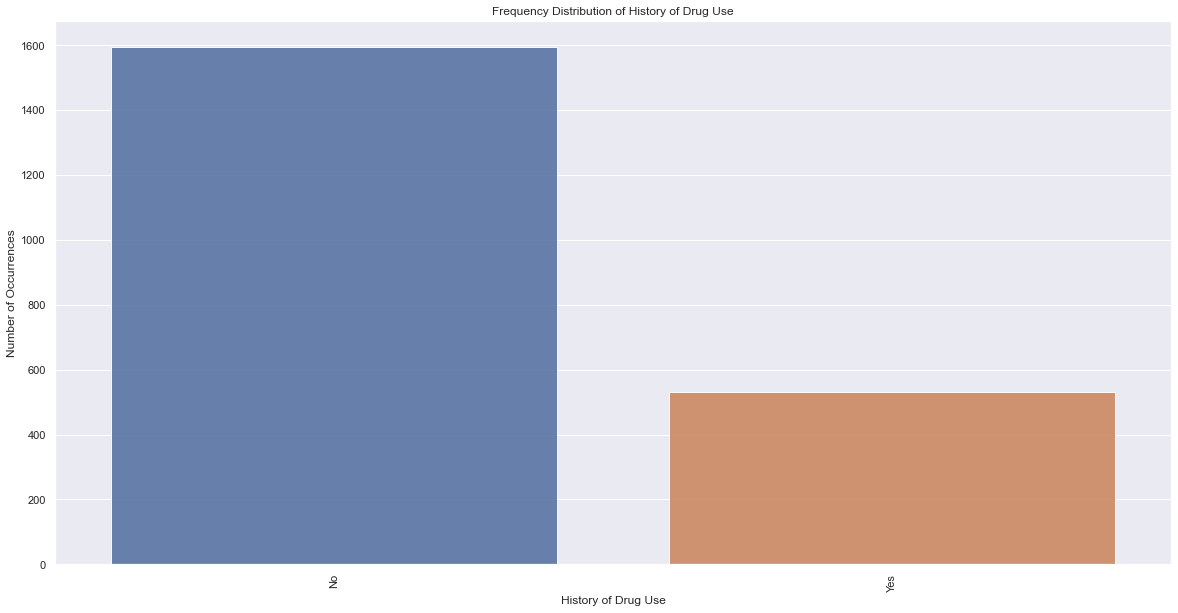

In [21]:
fig, ax = plt.subplots(figsize=(20, 10))
age_count = df['History of Drug Use'].value_counts()
sns.set(style="darkgrid")
sns.barplot(age_count.index, age_count.values, alpha=0.9)
plt.title('Frequency Distribution of History of Drug Use')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('History of Drug Use')
plt.xticks(rotation=90) 
plt.show()

## History of Rehab


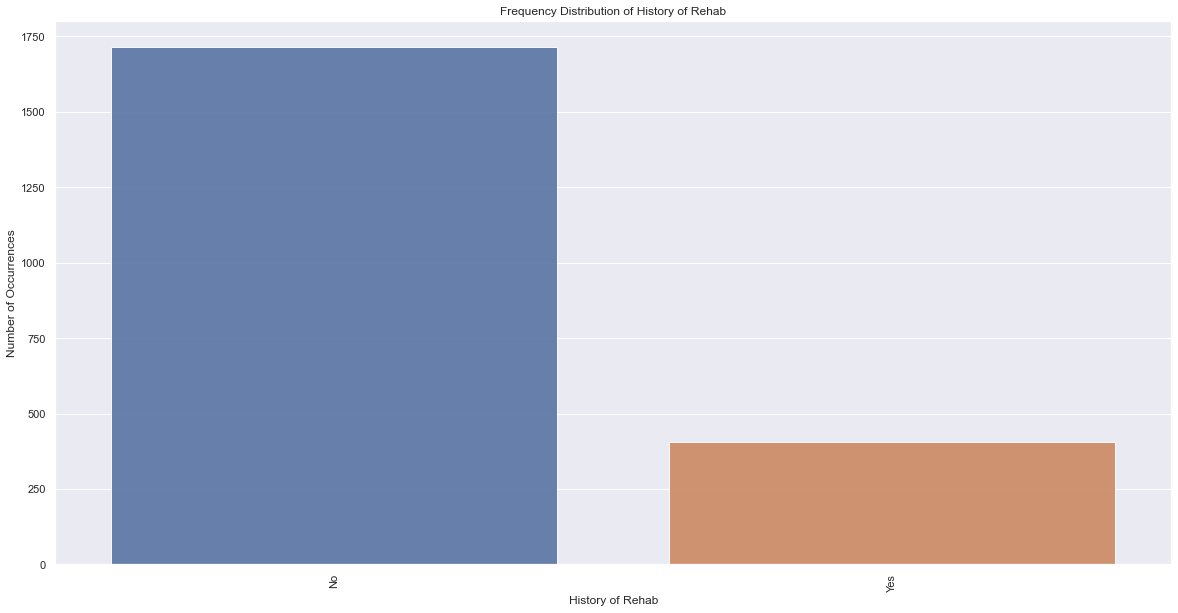

In [22]:
fig, ax = plt.subplots(figsize=(20, 10))
age_count = df['History of Rehab'].value_counts()
sns.set(style="darkgrid")
sns.barplot(age_count.index, age_count.values, alpha=0.9)
plt.title('Frequency Distribution of History of Rehab')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('History of Rehab')
plt.xticks(rotation=90) 
plt.show()

## MDR-TB
This is also has more of the postive than negative of the target feature. the model mighe learn well for to classify **No** than **yes** for the target. will try to work with it and we see.

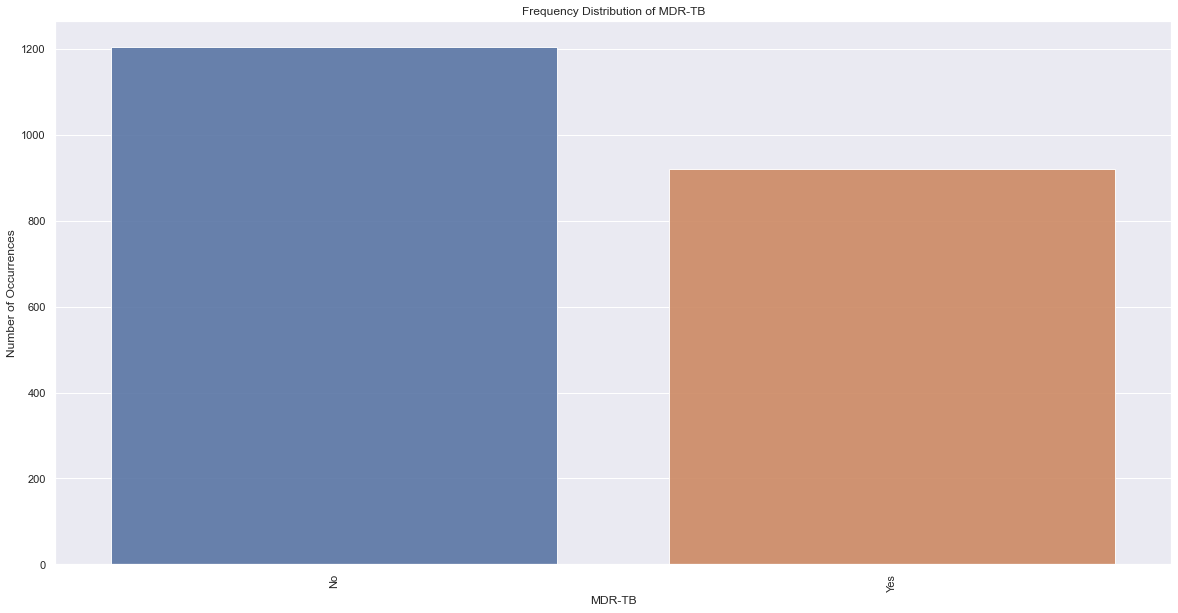

In [23]:
fig, ax = plt.subplots(figsize=(20, 10))
age_count = df['MDR-TB'].value_counts()
sns.set(style="darkgrid")
sns.barplot(age_count.index, age_count.values, alpha=0.9)
plt.title('Frequency Distribution of MDR-TB')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('MDR-TB')
plt.xticks(rotation=90) 
plt.show()

## Body Mass Index

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

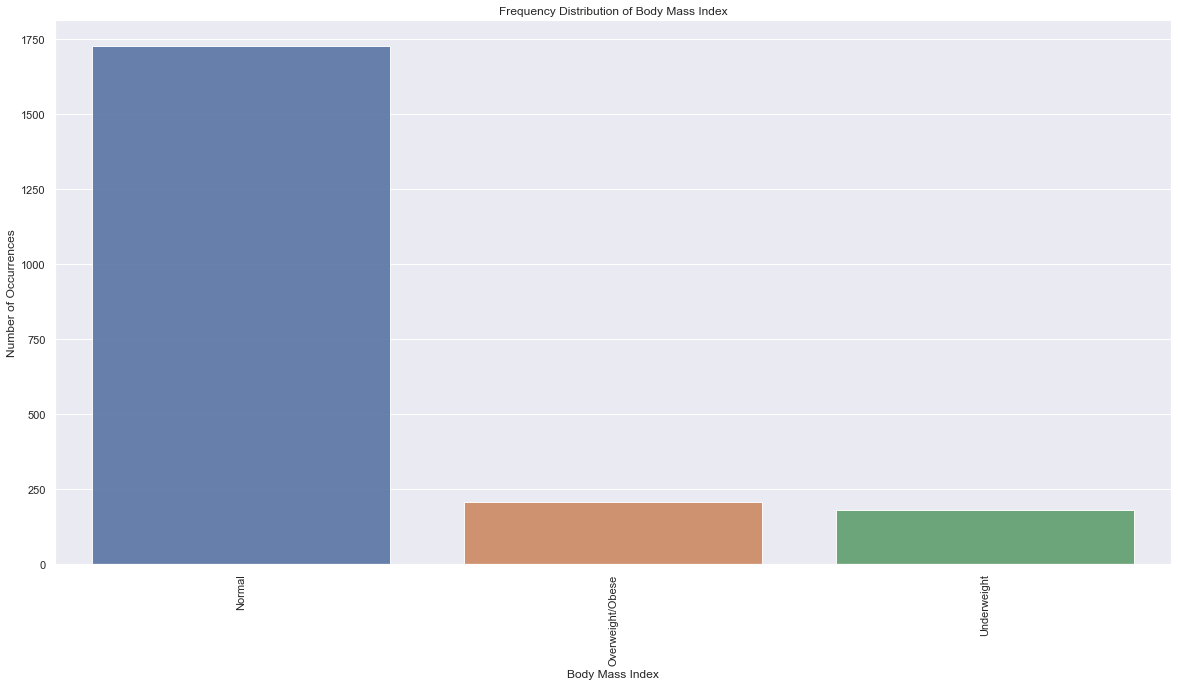

In [24]:
fig, ax = plt.subplots(figsize=(20, 10))
age_count = df['Body Mass Index'].value_counts()
sns.set(style="darkgrid")
sns.barplot(age_count.index, age_count.values, alpha=0.9)
plt.title('Frequency Distribution of Body Mass Index')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Body Mass Index')
plt.xticks(rotation=90) 


##  History of Chronic Disease

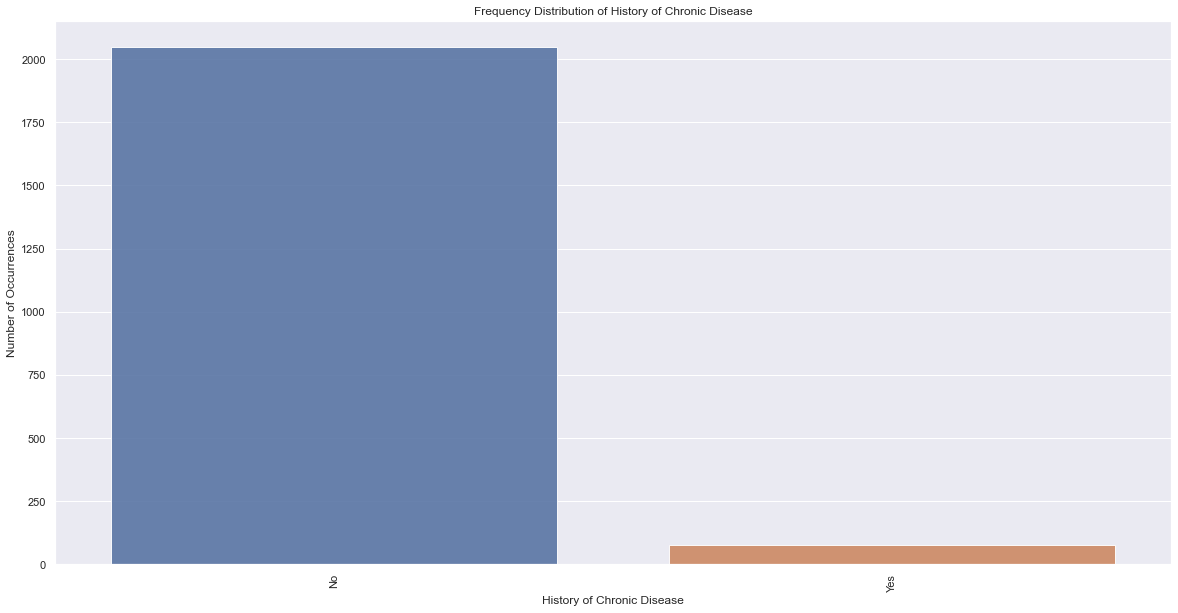

In [25]:
fig, ax = plt.subplots(figsize=(20, 10))
age_count = df['History of Chronic Disease'].value_counts()
sns.set(style="darkgrid")
sns.barplot(age_count.index, age_count.values, alpha=0.9)
plt.title('Frequency Distribution of History of Chronic Disease')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('History of Chronic Disease')
plt.xticks(rotation=90) 
plt.show()

 ## HIV Status 

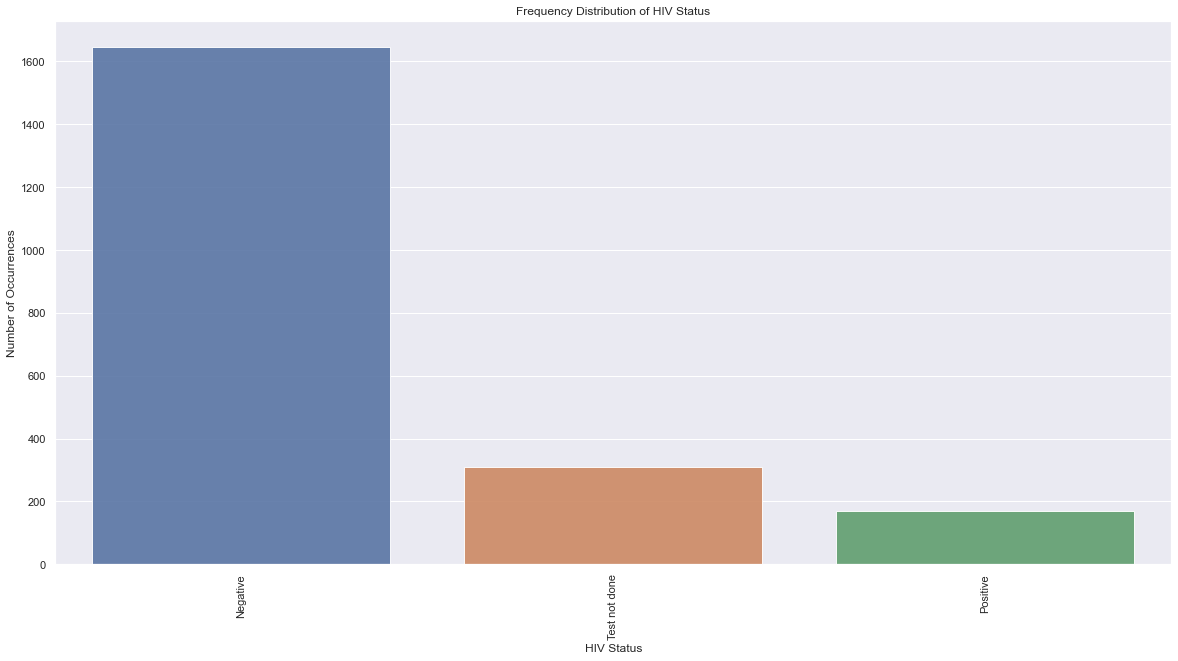

In [26]:
fig, ax = plt.subplots(figsize=(20, 10))
age_count = df['HIV Status'].value_counts()
sns.set(style="darkgrid")
sns.barplot(age_count.index, age_count.values, alpha=0.9)
plt.title('Frequency Distribution of HIV Status')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('HIV Status')
plt.xticks(rotation=90) 
plt.show()

## History Diabetes Melitus


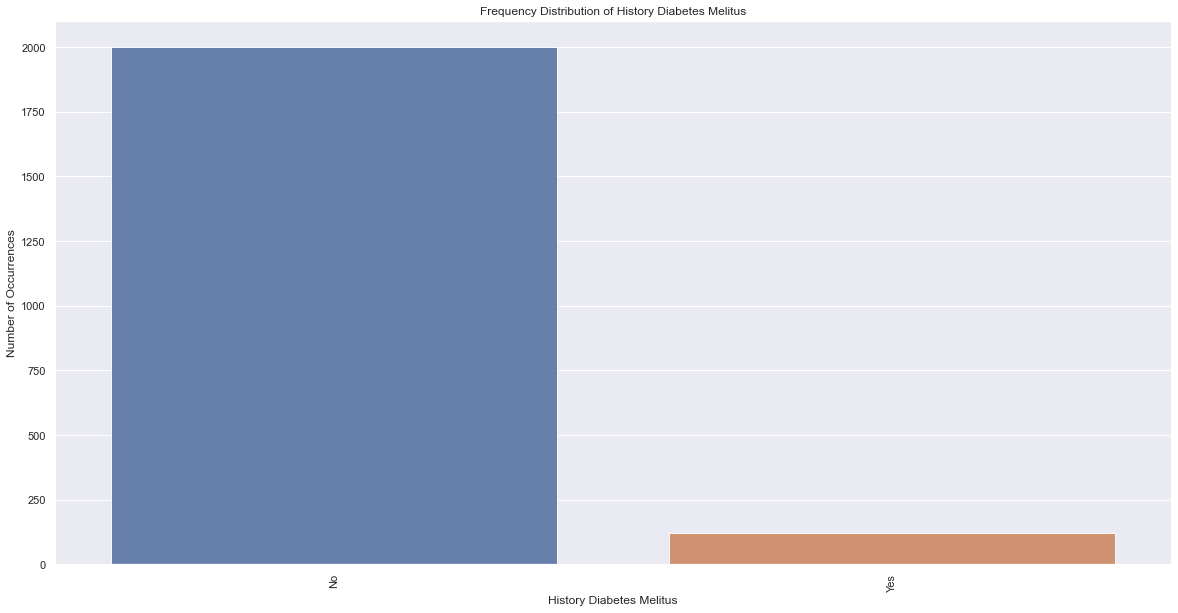

In [27]:
fig, ax = plt.subplots(figsize=(20, 10))
age_count = df['History Diabetes Melitus'].value_counts()
sns.set(style="darkgrid")
sns.barplot(age_count.index, age_count.values, alpha=0.9)
plt.title('Frequency Distribution of History Diabetes Melitus')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('History Diabetes Melitus')
plt.xticks(rotation=90) 
plt.show()

## Treatment Outcome

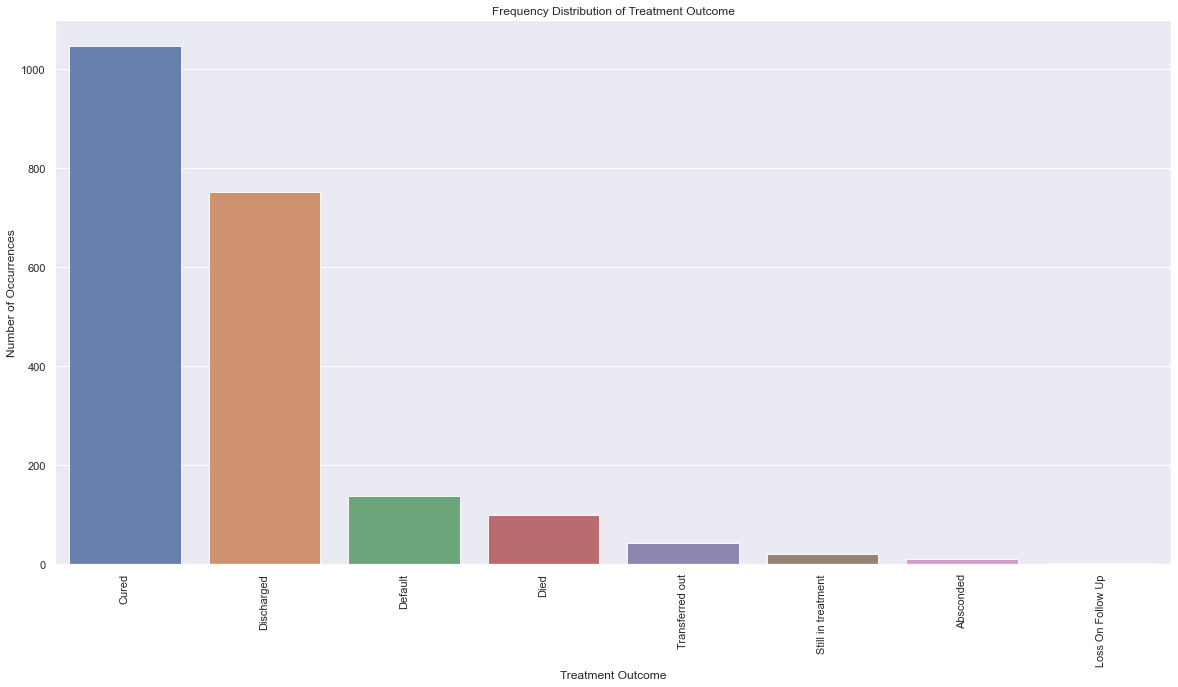

In [28]:
fig, ax = plt.subplots(figsize=(20, 10))
age_count = df['Treatment Outcome'].value_counts()
sns.set(style="darkgrid")
sns.barplot(age_count.index, age_count.values, alpha=0.9)
plt.title('Frequency Distribution of Treatment Outcome')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Treatment Outcome')
plt.xticks(rotation=90) 
plt.show()

## Feature engineering 


### Encoding Categorical Data
Turning the string data to integers since machine learning models work with only numbers

In [29]:
df.columns

Index(['Age', 'Sex', 'Marital Status', 'Poverty Level', 'Prison History',
       'Completed Secondary Education', 'History of Tobacco Use',
       'Alcohol Use at Least Once Per Week', 'History of Drug Use',
       'History of Rehab', 'MDR-TB', 'Body Mass Index',
       'History of Chronic Disease', 'HIV Status', 'History Diabetes Melitus',
       'Treatment Outcome'],
      dtype='object')

In [30]:
#age
age_labels = df['Age'].astype('category').cat.categories.tolist()
age_map_comp = {'Age' : {k: v for k,v in zip(age_labels,list(range(1,len(age_labels)+1)))}}
#sex
sex_labels = df['Sex'].astype('category').cat.categories.tolist()
sex_map_comp = {'Sex' : {k: v for k,v in zip(sex_labels,list(range(1,len(sex_labels)+1)))}}

#
Marital_Status_labels = df['Marital Status'].astype('category').cat.categories.tolist()
Marital_Status_map_comp = {'Marital Status' : {k: v for k,v in zip(Marital_Status_labels,list(range(1,len(Marital_Status_labels)+1)))}}

#Poverty_labels
Poverty_labels = df['Poverty Level'].astype('category').cat.categories.tolist()
Poverty_map_comp = {'Poverty Level' : {k: v for k,v in zip(Poverty_labels,list(range(1,len(Poverty_labels)+1)))}}

#
Prison_History_labels = df['Prison History'].astype('category').cat.categories.tolist()
Prison_History_map_comp = {'Prison History' : {k: v for k,v in zip(Prison_History_labels,list(range(1,len(Prison_History_labels)+1)))}}

#
Completed_Secondary_Education_labels = df['Completed Secondary Education'].astype('category').cat.categories.tolist()
Completed_Secondary_Education_map_comp = {'Completed Secondary Education' : {k: v for k,v in zip(Completed_Secondary_Education_labels ,list(range(1,len(Completed_Secondary_Education_labels)+1)))}}

#
#
History_of_Tobacco_Use_labels = df['History of Tobacco Use'].astype('category').cat.categories.tolist()
History_of_Tobacco_Use_map_comp = {'History of Tobacco Use' : {k: v for k,v in zip(History_of_Tobacco_Use_labels,list(range(1,len(History_of_Tobacco_Use_labels)+1)))}}

#
Alcohol_Use_at_Least_Once_Per_Week_labels = df['Alcohol Use at Least Once Per Week'].astype('category').cat.categories.tolist()
Alcohol_Use_at_Least_Once_Per_Week_map_comp = {'Alcohol Use at Least Once Per Week' : {k: v for k,v in zip(Alcohol_Use_at_Least_Once_Per_Week_labels,list(range(1,len(Alcohol_Use_at_Least_Once_Per_Week_labels)+1)))}}

#
History_of_Drug_Use_labels = df['History of Drug Use'].astype('category').cat.categories.tolist()
History_of_Drug_Use_map_comp = {'History of Drug Use' : {k: v for k,v in zip(History_of_Drug_Use_labels,list(range(1,len(History_of_Drug_Use_labels)+1)))}}

#
History_of_Rehab_labels = df['History of Rehab'].astype('category').cat.categories.tolist()
History_of_Rehab_map_comp = {'History of Rehab' : {k: v for k,v in zip(History_of_Rehab_labels,list(range(1,len(History_of_Rehab_labels)+1)))}}
#
MDR_TB_labels = df['MDR-TB'].astype('category').cat.categories.tolist()
MDR_TB_map_comp = {'MDR-TB' : {k: v for k,v in zip(MDR_TB_labels,list(range(1,len(MDR_TB_labels)+1)))}}

#
Body_Mass_Index_labels = df['Body Mass Index'].astype('category').cat.categories.tolist()
Body_Mass_Index_map_comp = {'Body Mass Index' : {k: v for k,v in zip(Body_Mass_Index_labels,list(range(1,len(Body_Mass_Index_labels)+1)))}}
#
History_of_Chronic_Disease_labels = df['History of Chronic Disease'].astype('category').cat.categories.tolist()
History_of_Chronic_Disease_map_comp = {'History of Chronic Disease' : {k: v for k,v in zip(History_of_Chronic_Disease_labels,list(range(1,len(History_of_Chronic_Disease_labels)+1)))}}
#
HIV_Status_labels = df['HIV Status'].astype('category').cat.categories.tolist()
HIV_Status_map_comp = {'HIV Status' : {k: v for k,v in zip(HIV_Status_labels,list(range(1,len(HIV_Status_labels)+1)))}}
#
History_Diabetes_Melitus_labels = df['History Diabetes Melitus'].astype('category').cat.categories.tolist()
History_Diabetes_Melitus_map_comp = {'History Diabetes Melitus' : {k: v for k,v in zip(History_Diabetes_Melitus_labels,list(range(1,len(History_Diabetes_Melitus_labels)+1)))}}

#
Treatment_Outcome_labels = df['Treatment Outcome'].astype('category').cat.categories.tolist()
Treatment_Outcome_map_comp = {'Treatment Outcome' : {k: v for k,v in zip(Treatment_Outcome_labels,list(range(1,len(Treatment_Outcome_labels)+1)))}}


In [31]:
features =[age_map_comp,sex_map_comp ,Marital_Status_map_comp,Poverty_map_comp ,Prison_History_map_comp,Completed_Secondary_Education_map_comp,History_of_Tobacco_Use_map_comp,Alcohol_Use_at_Least_Once_Per_Week_map_comp,History_of_Drug_Use_map_comp,History_of_Rehab_map_comp,MDR_TB_map_comp,Body_Mass_Index_map_comp,History_of_Chronic_Disease_map_comp,HIV_Status_map_comp,History_Diabetes_Melitus_map_comp,Treatment_Outcome_map_comp] 
for feature in features: 
    df.replace(feature, inplace=True)



In [32]:
df.head()

,Age,Sex,Marital Status,Poverty Level,Prison History,Completed Secondary Education,History of Tobacco Use,Alcohol Use at Least Once Per Week,History of Drug Use,History of Rehab,MDR-TB,Body Mass Index,History of Chronic Disease,HIV Status,History Diabetes Melitus,Treatment Outcome
0,4,2,3.0,1.0,1.0,2.0,3.0,2.0,1,1.0,1,3.0,1,1,1.0,2.0
1,4,2,2.0,1.0,1.0,2.0,2.0,1.0,1,1.0,1,1.0,1,1,1.0,2.0
2,3,2,2.0,1.0,1.0,1.0,2.0,2.0,2,2.0,1,3.0,1,1,1.0,2.0
3,3,2,2.0,2.0,1.0,1.0,2.0,2.0,1,1.0,1,1.0,1,1,1.0,2.0
4,4,2,2.0,1.0,1.0,2.0,2.0,NaN,1,1.0,1,2.0,1,3,1.0,2.0


In [33]:
#  drop the ID and Time to Default (Days) columns.
#del df["ID"]
#del df["Time to Default (Days)"]


## correlation matrix
some features are correlated and maybe can be combined to create one feature for example history of rehab and history of drug use.

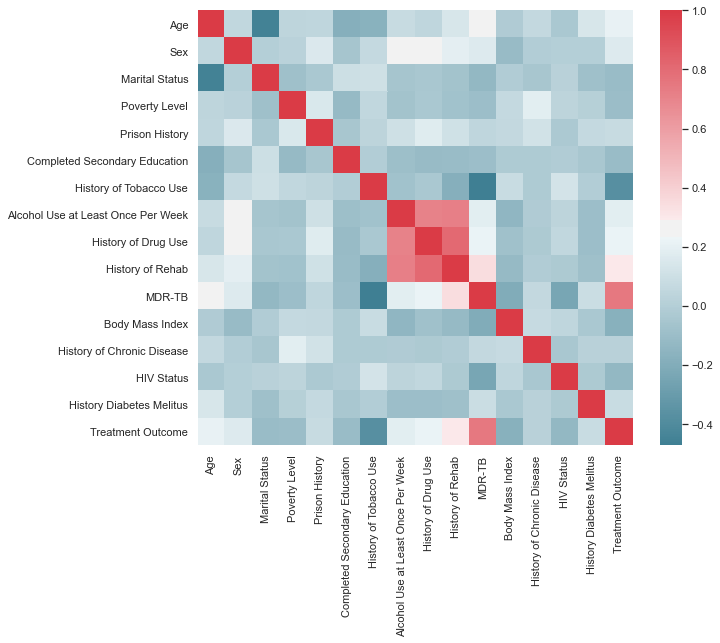

In [34]:
## correlation matrix
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
           square=True, ax=ax)

In [35]:
#drop nans
df.dropna(inplace=True)

## Feature importance
which features have a high impact on the  target value.


[0.01663576 0.0139989  0.01950162 0.00546555 0.00388417 0.00802111
 0.08583762 0.00748334 0.00842224 0.07483555 0.01138497 0.00475756
 0.03812505 0.00662171 0.69502484]


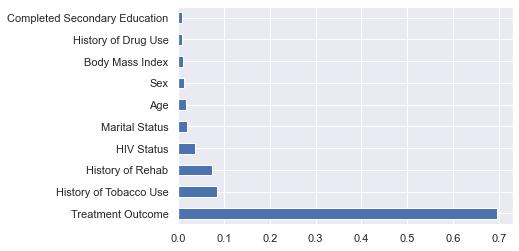

In [37]:

# x and y values

y =df['MDR-TB']
X = df.drop(['MDR-TB'], axis=1)

model = ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## Logistic regression model

In [38]:
# assign x and y values
X=df.drop(['MDR-TB'], axis=1)
y=df['MDR-TB']
# divide data into rain and test sets 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
# model instatiation and training 
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [39]:
## Model evaluation
#Accuracy score
score =model.score(X_test,y_test)
print(score)
# get predictions on test data


0.936046511627907


In [40]:
predictions =model.predict(X_test)
#comfusion matrix
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)


[[271  13]
 [ 20 212]]


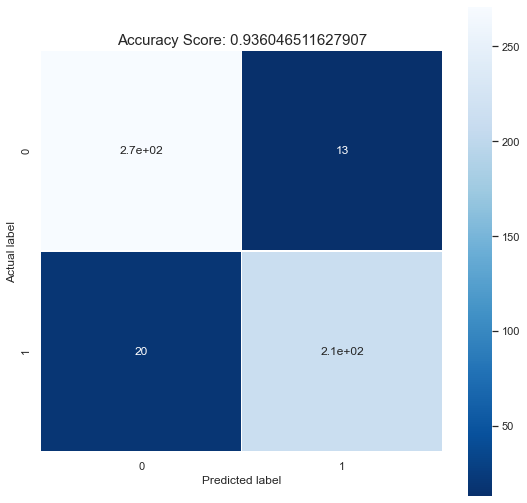

In [41]:
## confusion matrix
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

## support vector machine model

In [43]:
clf = svm.SVC(kernel='linear')

In [44]:
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [45]:
y_pred = clf.predict(X_test)

In [46]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.937984496124031


In [48]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9375
Recall: 0.9507042253521126


In [49]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[270  14]
 [ 18 214]]


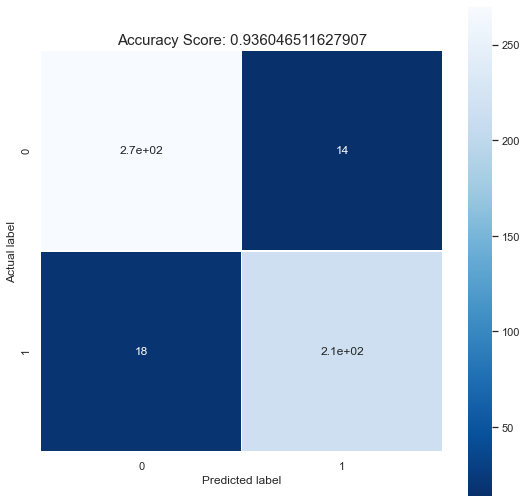

In [50]:
## confusion matrix
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);